# Report for geodata dataset

In [2]:
### Setup
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.api.types import CategoricalDtype

In [3]:
# nacitanie dat

census = pd.read_csv("./census11_21/data_obce_vyhl_nevyhl.csv")
census.columns = [x.lower() for x in census.columns]

crime = pd.read_csv("./kriminalita/kriminalita_obce.csv")
crime.columns= [x.lower() for x in crime.columns]

# obce_agg = pd.read_csv("./obce_agregace.csv")

df_cr_socdem = pd.merge(census, crime, on="obec_kod")

# out_fold = os.path.join(os.getcwd(), "output")

col_df = df_cr_socdem.columns
col_crime = crime.columns


In [4]:
def extract_cols_of(list_cols,item, obec_kod=False):
    cols=[]
    if obec_kod == True:
        cols.append("obec_kod")
    for col in list_cols:
        if item in col:
            cols.append(col)
    return cols

In [5]:
def plot_hist_mean_for_data(df, x_name):
    y_name="mean"
    x = [ "-".join(x.split("_")[1:]) for x in df.columns]
    y = [ (df[col].sum()/len(df[col])) for col in df.columns ]
    mx = [ df[col].max() for col in df.columns ]
    mn = [ df[col].min() for col in df.columns ]
    stderr = [df[col].std() for col in df.columns]
    plt.bar(x, y)
    plt.errorbar(x, y, fmt="o", yerr=stderr, color="black")
    plt.xticks(rotation=45)
    plt.show()

Every time I plot in the graphs below I used calculated mean and stdev from whole column (one variable) and I plotted it with column names on the x axis.

In [6]:
def exclude_columns_containing(df,*items):
    cols=[]
    for col in df.columns:
        col_ok = True
        for item in items:
            if item in col:
                col_ok = False
        if col_ok == True:
            cols.append(col)
    return df[cols]

# 1. Business understanding
### Description of problem to be solved

The aim of this repotrt is to find relations between certain demographic features and crime rate that is observed cities of Czech Republic. 
There might be stakeholders or investors that could center their investments on cities with neutral values for crime rate depending on the variables that are available. On the other side it might be usefull for political authorities that are in charge of constant improvement of citizens' wellbeing. 
High crime rate in cities naturally has negative impact on the satisfaction of its residents. European fonds might be allocated  to the towns in order to reach uniformity of city's development, etc.

Since census takes place on regular basis, modeling has potential to find valid links and correlations between observed variables (such as age average, highest proportion of people without or with insufficient education and crime rate.

By simple prior reasoning about correlations with crime rates of cities I suppose there are soft or even mild links with education of its residents. Other possible reason for increased crime rate might be insufficient care from state for the city's residents. Groups of people who might feel less supported financialy are families with 5+ children, or where people with different nationality or citizenship are prevalent. Partiall disadvantage is for people who can not speak the language (or other similar language) of the country they live in. 

Other possibly usefull feature might be info about previous experience with crime commitment. People who have been in jail before have hard time getting a job.  

In [7]:
sh_ce = census.shape
sh_cr = crime.shape
sh_t = df_cr_socdem.shape

# 2. Data understanding

## Description of input data
Data come from 2 different datasets. One dataset is from census that takes place every 10 years (data_obce_vyhl_nevyhl.csv). Its size is {{ sh_ce[0] }} rows & {{sh_ce[1]}} columns. 

The other dataset is containing crime id's and its posterior probability in each city. The size of the dataframe is {{sh_cr[0]}} rows & {{sh_cr[1]}} columns. Connected together with key "obec_kod" is {{sh_t[0]}} rows & {{sh_t[1]}} columns.

Tha datasets have been acquired from DataScience nextcloud from <a href="https://nextcloud.profinit.eu/index.php/s/rRZdYPDZnqkodD9" >Profinit </a> .
Input data can be divided into 11 groups depending on the area it describes. 
There are variables considering:
<ol>
    <li> Number of children in each city </li>
     - Range of number of children varies between 0 and 5+.
    <li> Houses and the material it is build of </li>
     - Houses built of wood, stones or bricks, extruded brick, panel houses ,differen material and unknown material
    <li> Period of time of its construction  </li>
     - Construction in range from 1919 up to 2021
    <li> House owner </li>
     - House can be owned by housing cooperative, physical person, state or city and person on its own. Every house owner category carries value for diff and mean between years 2021 and 2011
    <li> Propotions of nationalities </li>
    - List of nationalities Czech, Moravian, Slovak, Ukrainian or unknown
    <li> Proportions of citizenships</li>
        - Citizenships of values Czech, Slovak or Ukrainian (+unknown)
    <li> Family status</li>
        - Values single, married, widow/ed, divorced or unknown. With all these values there are also records for the mean and diff (between years 2011 and 2021)
    <li> Age </li>
        - Age ranges from newborns (0) up to 80 and more. Furthermore it also carries information about regarding gender. Also columns with value for mean and diff between years 2011 and 2021 is included for each age.
    <li> Religion of city's residents </li>
        - Religions occuring are Catholics, Hussites, Evangelicals, Ateists or people who are not classifing themselfs - not voting. Every religion carries value for diff and mean between years 2021 and 2011
    <li> Education </li>
        - Categorical values are without education, unknown, high school (without state exam), high school (with state exam), higher professional education (including conservatory), college, primary/secondary education or unfinished. Every category carries value for diff and mean between years 2021 and 2011.
</ol>

Exausting list of all columns in dataset for **census** is: 
> {{list(census.columns)}}

> Each column contains numeric values representing relative amount of people belonging to that category.

And list of all columns for **crime** is:
> {{list(crime.columns)}}

> Every columns represents posterior probability for that crime.
   

Additional information in **census** dataset are values which seemed to be the most usefull and therefore were normalised with beta distribution. The values with this tranformation are 
(vzdelani_nezj_vyhl_2021, 
jazyk_nezj_vyhl_2021, 
jazyk_cesky_vyhl_2021,
deti_5_vice_vyhl_2021,
domy_obd_1919_vyhl_2021, 
rod_stav_rozv_vyhl_mean, 
vzdelani_zakl_vyhl_mean,
rod_stav_zen_vdana_vyhl_mean,
vzdelani_str_np_vyhl_mean, 
vzdelani_vys_vyhl_mean,
vira_ateisti_vyhl_mean,
vek_80_inf_vyhl_mean, 
domy_vlast_obec_stat_vyhl_mean, 
domy_vlast_fyz_vyhl_mean
)


For further analysis I divided whole **census** dataset into subgrups of variables. I will describe each group separately with its own graphs. I have decided to work only with the columns that represent mean between values acquired from 2011 and 2021 and do not contain the values which are normalised. 

### Number of children

True


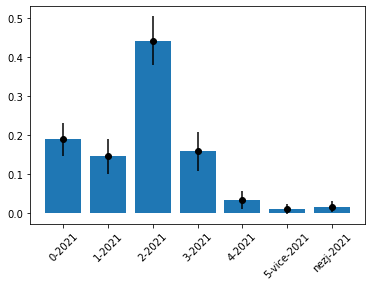

In [25]:
df_children = df_cr_socdem[extract_cols_of(col_df,"deti")]
df_children = exclude_columns_containing(df_children,"vyhl")

df_children["check"] = (df_children.sum(axis=1))
print(len(df_children.iloc[:,1]) == df_children["check"].sum())
df_children=df_children.drop(['check'], axis=1)

df = df_children.describe()
# print(df)

plot_hist_mean_for_data(df_children, "number_of_kids")

This variable has {{len(df_children.columns)}} categories. Each one expresses relative abundancy of families having given number or children.
Categories are {{list(df_children.columns)}}. The most frequent observation is that family has 2 kids (following are families with without children, 3 kids and 1 kid).

Summing each row separately gives 1 (without normalised column). That confirms that input data for number of children is correct. No null values occur.

### Houses - material

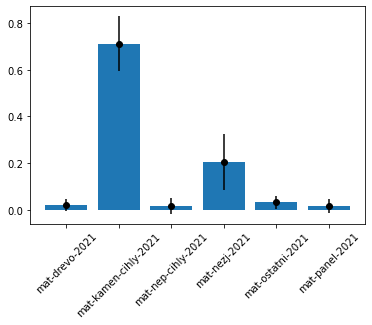

True


<ipython-input-8-c44afb05b8b3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_houses_m["check"] = (df_houses_m.sum(axis=1))


In [8]:
df_houses_m = df_cr_socdem[extract_cols_of(col_df, "domy_mat")]


plot_hist_mean_for_data(df_houses_m, "houses_material")

df_houses_m["check"] = (df_houses_m.sum(axis=1))
print(len(df_houses_m.iloc[:,1]) == df_houses_m["check"].sum())
df_houses_m=df_houses_m.drop(['check'], axis=1)

Values contained in the subgroup about material have {{len(df_houses_m.columns)}} categories. They are {{list(df_houses_m.columns)}}. Columns carry information what was the material used for house construction. Most frequently houses are build from stones and bricks. On the other end are houses which are build from extruded bricks, wood and panel. Approximately every fifth house has untracked material it is build of.

After summation of each row separately, results are equal to 1. That confirms that input data for construction material is correct. No null values occur.

## Houses - contruction

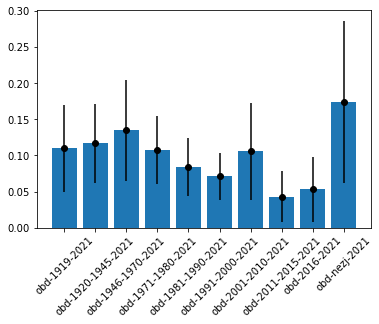

False
1.8189894035458565e-12


In [28]:
df_houses_c = df_cr_socdem[extract_cols_of(col_df, "domy_obd")]
df_houses_c = exclude_columns_containing(df_houses_c,"vyhl")

plot_hist_mean_for_data(df_houses_c, "construction_period")
df_houses_c.describe()

df_houses_c["check"] = (df_houses_c.sum(axis=1))

print(len(df_houses_c.iloc[:,1]) == df_houses_c["check"].sum())
err =len(df_houses_c.iloc[:,1]) - (df_houses_c["check"].sum())
print(err)
df_houses_c=df_houses_c.drop(['check'], axis=1)

### Houses - contruction
Another parameters that are tracked in dataset are about the period the building/house was built in. There are {{len(df_houses_c.columns)}} columns: {{list(df_houses_c.columns)}}.

Most frequent construction era was between 1946-1970. But almost 20% of the time the time range when the building was constracted is unknown or untracked. The lowest increase in new houses was in years 2001-2010, since less then 5% of building were constructed at that time.

In the dataset there is some row that does not add up to 1 and the overall error is {{err/len(df_nat.iloc[:,1])}}. It is pretty small value and can not be easily located due to implicit rounding of numbers. (Error was calculated as subtraction of number_of_rows and sum_of_each_row divided by count_of_vals_in_col)

## Houses - owner

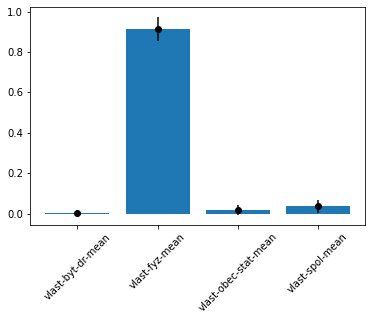

False
166.6597446237738
False
-9.094947017729282e-13


In [19]:

df_houses_o = df_cr_socdem[extract_cols_of(col_df, "domy_vlast")]
df_houses_o = exclude_columns_containing(df_houses_o,"vyhl","diff")

plot_hist_mean_for_data(df_houses_o, "house_owner")

df_houses_o.describe()

df_houses_o["check"] = (df_houses_o.sum(axis=1))

print(len(df_houses_o.iloc[:,1]) == df_houses_o["check"].sum())

check_perc=0.99
relevant_value = df_houses_o.loc[df_houses_o['check'] <check_perc]

err =len(df_houses_o.iloc[:,1]) - (df_houses_o["check"].sum())
print(err)
df_houses_o=df_houses_o.drop(['check'], axis=1)


# Err to add in each column
err_to_add = err / (len(df_houses_o.columns))

for col in df_houses_o.columns:
    # Add error to each value in columns uniformly
    col_len = len(df_houses_o[col])
    df_houses_o[col]+= err_to_add / col_len
    
df_houses_o["check"] = (df_houses_o.sum(axis=1))

print(len(df_houses_o.iloc[:,1]) == df_houses_o["check"].sum())
err2 = len(df_houses_o.iloc[:,1]) - (df_houses_o["check"].sum())
print(err2)
df_houses_o=df_houses_o.drop(['check'], axis=1)


In this group of data about the owner of constructions we observed who owns the house property. It contains {{len(df_houses_o.columns)}}
columns named {{list(df_houses_o.columns)}}.

After computing and plotting the average of building owners we can see that the owner - physical person is most frequent, about 90% of the time.

With summation check, here the error is more abundant. {{relevant_value.shape[0]}} rows has its sum lower than {{check_perc}}. The average error per row is {{err/len(df_houses_o.iloc[:,1])}}. I redistributed the error uniformely over all columns to achieve row sum 1.

### Languages

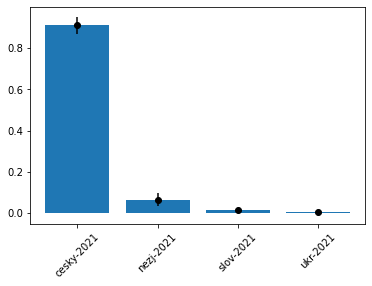

False
34.87718558608685


In [14]:
# language
df_lang = df_cr_socdem[extract_cols_of(col_df, "jazyk")]
df_lang = exclude_columns_containing(df_lang, "vyhl")

plot_hist_mean_for_data(df_lang, "languages")

df_lang["check"] = (df_lang.sum(axis=1))
check_perc=0.99
relevant_value = df_lang.loc[df_lang['check'] < check_perc]
print(len(df_lang.iloc[:,1]) == df_lang["check"].sum())
err = len(df_lang.iloc[:,1]) - (df_lang["check"].sum())
print(err)
df_lang=df_lang.drop(['check'], axis=1)

During the consensus in 2011 and 2021 data about langages spoken at the cities have been collected. There is/are {{len(df_lang.columns)}} categories and their values are {{list(df_lang.columns)}}.

In the dataset there are some rows that do not add up to 1 and the average error per row is {{err/len(df_lang.iloc[:,1])}}. There are {{relevant_value.shape[0]}} rows that have sum value of each row below {{check_perc}} (Error was calculated as subtraction of number_of_rows and sum_of_sum_of_each_row divided by count_of_vals_in_col)

## Nationality

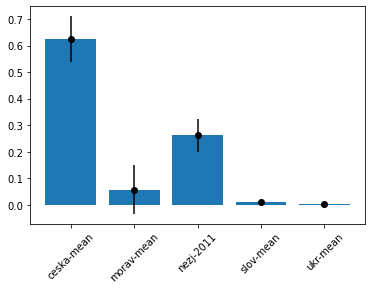

False
274.4439643982696 

True
0.0


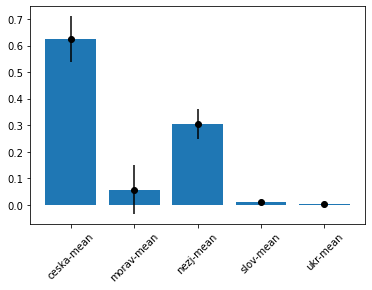

In [15]:
df_nat = df_cr_socdem[extract_cols_of(col_df, "narod")]
df_nat = exclude_columns_containing(df_nat, "diff", "vyhl")
plot_hist_mean_for_data(df_nat, "nationalities")


df_nat["check"] = (df_nat.sum(axis=1))
check_perc=0.90
relevant_value = df_nat.loc[df_nat['check'] < check_perc]
# print(relevant_value)
print(len(df_nat.iloc[:,1]) == df_nat["check"].sum())
err = len(df_nat.iloc[:,1]) - (df_nat["check"].sum())
print(err, "\n")

# Fixing the resulting sum of each row
no_2011_df = exclude_columns_containing(df_nat, "2011", "check")
df_nat["narod_nezj_2011"] = 1-no_2011_df.sum(axis=1)
df_nat["check"] = (exclude_columns_containing(df_nat, "check").sum(axis=1))

print(len(df_nat.iloc[:,1]) == df_nat["check"].sum())
err2 = len(df_nat.iloc[:,1]) - (df_nat["check"].sum())
print(err2)
df_nat.rename(columns = {'narod_nezj_2011':'narod_nezj_mean'}, inplace = True)
df_nat=df_nat.drop(['check'], axis=1)
plot_hist_mean_for_data(df_nat, "nationalities")

The nationalities found amongst all citites are {{list(df_nat.columns)}}. As is visible from the graph the most abundant nationality is is Czech and then the second one is proportion of people with unknown nationality.

In the dataset there are many rows that do not add up to 1 and the average error per row is {{err/len(df_nat.iloc[:,1])}}. Might be the result of using columns with mean (between years 2011 and 2021) and not the exact value for each year. What might be more disturbing is that dataset does not contain mean value for unknown nationality.
Since it is the last category and represents the unknown nationality, it is safe to rewrite the value for each redord in this column. After that the sum of each row would is 1 (as necessary for relative frequencies).

There are {{relevant_value.shape[0]}} rows that have sum value of each row below {{check_perc}} (Error was calculated as subtraction of number_of_rows and sum_of_sum_of_each_row divided by count_of_vals_in_col).

### Citizenship

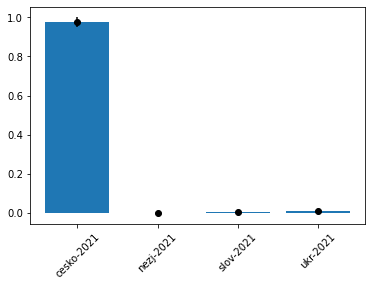

False
58.955831803205


In [14]:
df_citiz = df_cr_socdem[extract_cols_of(col_df, "obcanstvi")]
df_citiz = exclude_columns_containing(df_citiz, "vyhl", "diff")
plot_hist_mean_for_data(df_citiz, "citizens")

df_citiz["check"] = (df_citiz.sum(axis=1))
check_perc=1
relevant_value = df_citiz.loc[df_citiz['check'] > check_perc]
# print(relevant_value)
print(len(df_citiz.iloc[:,1]) == df_citiz["check"].sum())
err = len(df_citiz.iloc[:,1]) - (df_citiz["check"].sum())
print(err)

The citizens of Czech Republic (where the census took place)  have {{len(df_citiz.columns)}} categories: {{list(df_citiz.columns)}}. Most people are Czech. Other categories have only small fraction of people (below 2%). 

Some rows do not add up to 1 and have average error per row: {{err/len(df_nat.iloc[:,1])}}. But it is acceptable error. There are {{relevant_value.shape[0]}} rows that have sum value of each row above {{check_perc}} (Error was calculated as subtraction of number_of_rows and sum_of_sum_of_each_row divided by count_of_vals_in_col).

### Family status

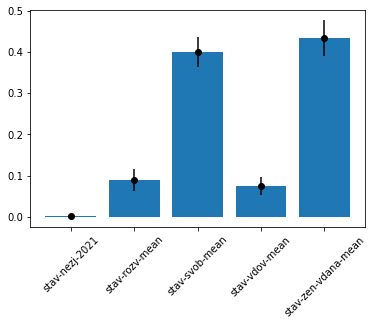

False
-2.305732489669026
True
0.0


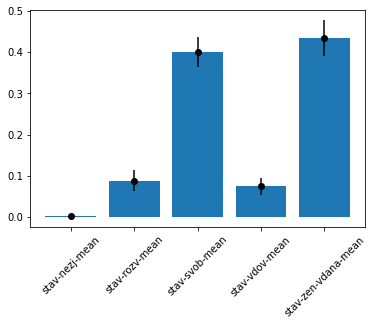

In [16]:
# family status
df_status = df_cr_socdem[extract_cols_of(col_df, "rod")]
df_status = exclude_columns_containing(df_status, "diff","vyhl","narod")

plot_hist_mean_for_data(df_status, "family_status")

df_status["check"] = (df_status.sum(axis=1))
check_perc=0.95
relevant_value = df_status.loc[df_status['check'] < check_perc]
print(len(df_status.iloc[:,1]) == df_status["check"].sum())
err = len(df_status.iloc[:,1]) - (df_status["check"].sum())
print(err)

# Fixing sum of rows to 1 in category unknown
no_2021_df = exclude_columns_containing(df_status, "2021", "check")
df_status["rod_stav_nezj_2021"] = 1-no_2021_df.sum(axis=1)
df_status["check"] = df_status.drop(['check'], axis=1).sum(axis=1)

print(len(df_status.iloc[:,1]) == df_status["check"].sum())
err2 = len(df_status.iloc[:,1]) - (df_status["check"].sum())
print(err2)
df_status.rename(columns = {'rod_stav_nezj_2021':'rod_stav_nezj_mean'}, inplace = True)
df_status=df_status.drop(['check'], axis=1)
plot_hist_mean_for_data(df_status, "family_status")

Family status of people from observed cities has {{len(df_status.columns)}} categories which are {{list(df_status.columns)}}. 
Most of the people are either marries or single. Next less abundant proportion of people are for divorced and widow/er.

Necessary to recalculare mean values for family state "unknown" (as with nationalities). 

There are many rows that do not add up to 1 and the average error per row is {{err/len(df_nat.iloc[:,1])}}. There is {{relevant_value.shape[0]}} row that have sum value of each row below {{check_perc}} (Error was calculated as subtraction of number_of_rows and sum_of_sum_of_each_row divided by count_of_vals_in_col).

### Age

False
8.211082526291648
For subset of women and men:
False
8.211082526297105


<ipython-input-16-4ff0ecc58baf>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["check"] = (df.sum(axis=1))
<ipython-input-16-4ff0ecc58baf>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["check"] = (df.sum(axis=1))


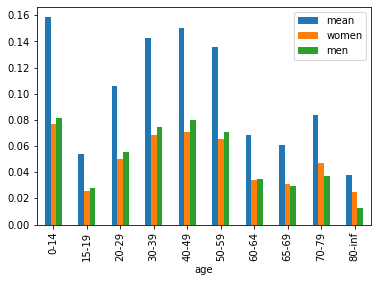

In [16]:
df_age = df_cr_socdem[extract_cols_of(col_df, "vek") ]
df_age = exclude_columns_containing(df_age, "diff", "vyhl")

df_age_muzi = df_age[extract_cols_of(df_age, "muzi")]
df_age_zeny = df_age[extract_cols_of(df_age, "zeny")]
df_age_mean = exclude_columns_containing(df_age, "muzi","zeny")

# plot_hist_mean_for_data(df_age_mean, "age")
# plot_hist_mean_for_data(df_age_muzi, "age")
# plot_hist_mean_for_data(df_age_zeny, "age")

cols=["age","mean","women","men"]
muz_zen_mean = pd.DataFrame(columns=cols)
for i in range(0, len(df_age_mean.columns)):
    ag="-".join(df_age_mean.columns[i].split("_")[1:3])
    muz_zen_mean = muz_zen_mean.append({cols[0]:ag,
                                        cols[1]:df_age_mean[df_age_mean.columns[i]].mean(),
                                       cols[2]:df_age_zeny[df_age_zeny.columns[i]].mean(),
                                       cols[3]:df_age_muzi[df_age_muzi.columns[i]].mean(),
                                       }, ignore_index=True)

muz_zen_mean.plot(x="age", y=cols[1:], kind="bar")

df=df_age_mean
df["check"] = (df.sum(axis=1))
check_perc=0.99
relevant_value = df.loc[df['check'] < check_perc]
print(len(df.iloc[:,1]) == df["check"].sum())
err = len(df.iloc[:,1]) - (df["check"].sum())
print(err)
df.drop(['check'], axis=1)

suma=0
for df in [df_age_zeny,df_age_muzi]:
    df["check"] = (df.sum(axis=1))
    suma += df["check"].sum()
    df.drop(['check'], axis=1)
    
print("For subset of women and men:")
print(len(df.iloc[:,1]) == suma)
print(len(df.iloc[:,1]) - suma)


Age subgroup has {{len(df_age.columns)}} and the columns are: {{list(df_age.columns)}}

Most common age is 0-14 and then follows the 40-49, 30-39, 50-59. Seems like growing population, since the youngest are most prevalent. Graph depicting age mean shows which gender is more frequent. Seems like men are almost always one step higher in frequency. 

Some rows do not sum up to 1 and the average error per row is {{err/len(df_age_mean.iloc[:,1])}} (acceptable). There are {{relevant_value.shape[0]}} rows that have sum value of each row below {{check_perc}} (Error was calculated as subtraction of number_of_rows and sum_of_sum_of_each_row divided by count_of_vals_in_col).

Looks like columns which describe age of men and women were used to calculate the mean because group-men&women have the same row error as the subgroup for age categories where no gender is specified.

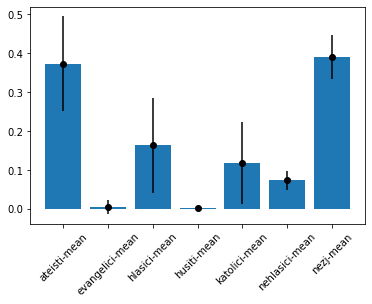

False
-778.0880909925199
True
0.0


In [11]:
# religion
df_rel = df_cr_socdem[extract_cols_of(col_df, "vira")]
df_rel = exclude_columns_containing(df_rel, "diff", "vyhl")
plot_hist_mean_for_data(df_rel, "religions")

df=df_rel
df["check"] = (df.sum(axis=1))
check_perc=0.99
relevant_value = df.loc[df['check'] < check_perc]
print(len(df.iloc[:,1]) == df["check"].sum())
err = len(df.iloc[:,1]) - (df["check"].sum())
print(err)
df =df.drop(['check'], axis=1)
df_rel = df


# Err to add in each column
err_to_add = err / (len(df_rel.columns))

for col in df_rel.columns:
    # Add error to each value in columns uniformly
    col_len = len(df_rel[col])
    df_rel[col]+= err_to_add / col_len 

df_rel["check"] = (df_rel.sum(axis=1))
print(len(df_rel.iloc[:,1]) == df_rel["check"].sum())
err2 = len(df_rel.iloc[:,1]) - (df_rel["check"].sum())
print(err2)

Subgroup around religion contains {{len(df_rel.columns)}} categories and those are {{list(df_rel.columns)}}. From barplot it looks like most people from Czech republic are atheists, since almost 40% people classified themselfs as Atheists. Besides the most frequent value from concrete category there is also category for religion not being known (for cerca 40% of residents). There are cities where every second person is atheist or every forth. Values differ as shown by black vertical line. 

Some rows do not sum up to 1 and the average error per row is {{err/len(df_rel.iloc[:,1])}} ( NOT acceptable). Some values must be lost. Possible way how to correct this difference is to adjust the value for "unknown" category or uniformly split the difference between mentioned {{len(df_rel.columns)}} categories. I did the uniform addition of error amongst all values in the dataframe. After this transformation each rows sums up to 1.

### Education

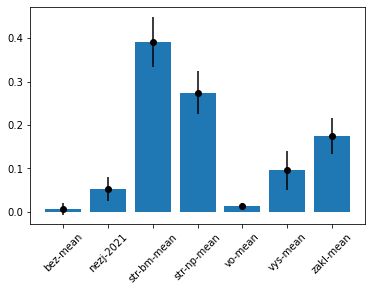

False
-39.670260684716595
True
0.0


In [13]:
df_edu = df_cr_socdem[extract_cols_of(col_df, "vzdelani")]
df_edu = exclude_columns_containing(df_edu, "diff", "vyhl")

plot_hist_mean_for_data(df_edu, "education")

df=df_edu
df["check"] = (df.sum(axis=1))
check_perc=0.99
relevant_value = df.loc[df['check'] < check_perc]
print(len(df.iloc[:,1]) == df["check"].sum())
err = len(df.iloc[:,1]) - (df["check"].sum())
print(err)
df =df.drop(['check'], axis=1)
df = df_edu

# Fixing sum of rows to 1 in category unknown
no_2021_df = exclude_columns_containing(df_edu, "2021", "check")
df_edu["vzdelani_nezj_2021"] = 1-no_2021_df.sum(axis=1)
df_edu["check"] = df_edu.drop(['check'], axis=1).sum(axis=1)

print(len(df_edu.iloc[:,1]) == df_edu["check"].sum())
err2 = len(df_edu.iloc[:,1]) - (df_edu["check"].sum())
print(err2)
df_edu.rename(columns = {'vzdelani_nezj_2021':'vzdelani_nezj_mean'}, inplace = True)
df_edu=df_edu.drop(['check'], axis=1)

When looking at education we can find {{len(df_edu.columns)}} categories listed: {{list(df_edu.columns)}}. Most of the residents amongst all cities have high school without final state exams and then people with high school and final exam follow. Surprisingly less people are with college degree than people who have only primary and secundary education (or dropped school early).
Values for education were calculated only for people that are older than 15.

Checking sum of row gives row error: {{err/len(df_edu.iloc[:,1])}}. This is acceptable, but I will recalculate this error and fix it in column for "unknown" category (because is th subgroup it is for year 2021 and other values are means).


### Crime

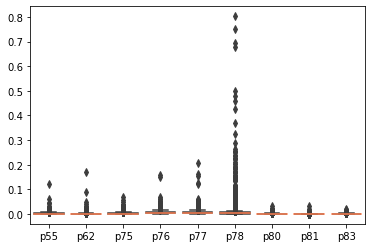

               p55          p62          p75          p76          p77  \
count  6254.000000  6254.000000  6254.000000  6254.000000  6254.000000   
mean      0.002455     0.001141     0.002713     0.006746     0.005656   
std       0.002871     0.003236     0.003908     0.006036     0.006763   
min       0.000134     0.000011     0.000036     0.000312     0.000113   
25%       0.001001     0.000138     0.000534     0.002909     0.001904   
50%       0.001616     0.000288     0.001210     0.005193     0.004151   
75%       0.003237     0.001191     0.003579     0.008907     0.007495   
max       0.122060     0.171782     0.068884     0.158378     0.205006   

               p78          p80          p81          p83  
count  6254.000000  6254.000000  6254.000000  6254.000000  
mean      0.007732     0.001337     0.000244     0.001096  
std       0.028349     0.001586     0.000764     0.001397  
min       0.000079     0.000047     0.000003     0.000025  
25%       0.001317     0.000443  

In [19]:
crime_no = crime.loc[:,col_crime!="obec_kod"] #bez id obce
sns.boxplot(data=crime_no, orient="v", medianprops={"color": "coral"})
plt.show()


print(crime_no.describe())

Data subset in this group is portraying crimes classified according to crime id. There are {{len(crime_no.columns)}} of them and those are {{list(crime_no.columns)}}. 
<ol>
    <li> p55 - all other property crimes </li>
    <li> p62 - offences agains the public interest </li>
    <li> p75 - In the field of protection against alcoholism and toxic addiction </li>
    <li> p76 - Against public order and civil coexistence </li>
    <li> p77 - Agains property </li>
    <li> p78 - Toxicomania </li>
    <li> p81 - Illegal production, possession and sale of narcotic drugs and poisons </li>
    <li> p83 - Other forms of toxic addiction including misdemeanours </li>
</ol>

Values in these columns are posterior probabilities for each crime in each city. Posterior probabilities are acquired from previous computation and data.